### Concrete Strength Prediction - Regression Problem

In [1]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Bharathy_Nat/aiml_repo/Concrete-Strength-Prediction/concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.shape

(1030, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

Though 'Age' column is a numerical, it has few distinct values, 
and hence can be treated as categorical, and then labelEncoded to get ordinal numerical values


In [9]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

'slag' and 'superplastic' seem to be right skewed

In [10]:
## remove Duplicate Rows 
df.drop_duplicates(inplace=True)
df.shape


(1005, 9)

### Univariate Analysis

Frequency Distribution plots of all the Numerical fields

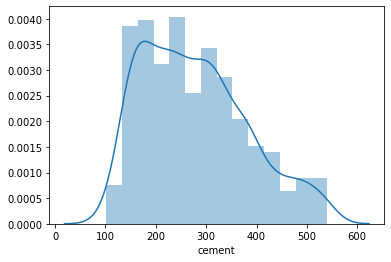

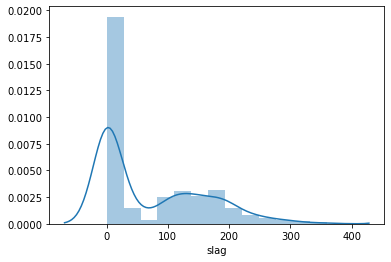

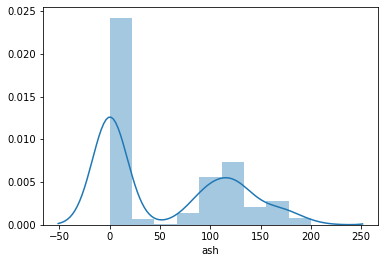

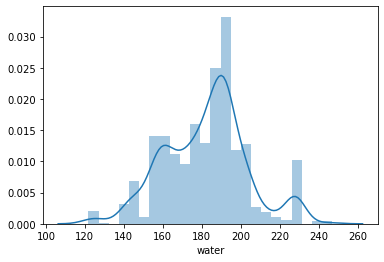

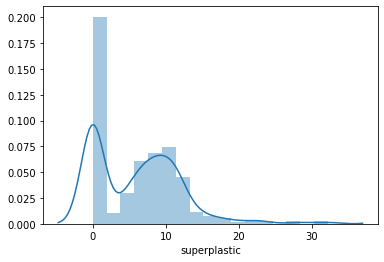

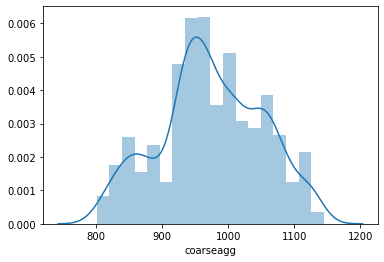

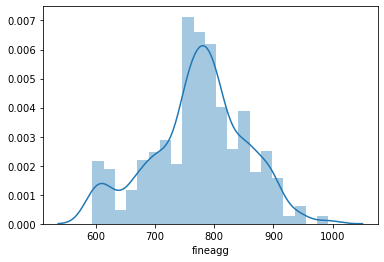

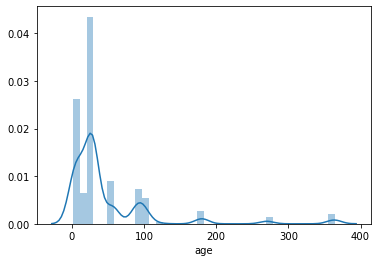

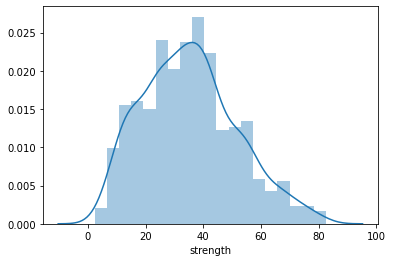

In [11]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    

### Bivariate Analysis

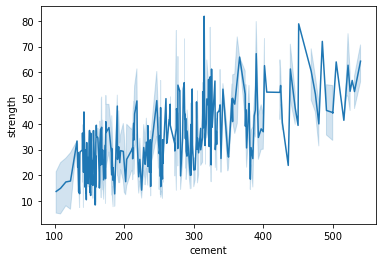

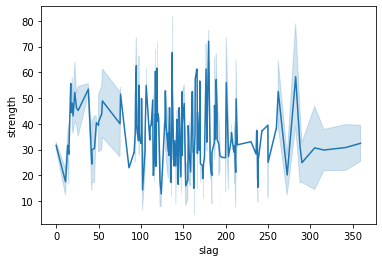

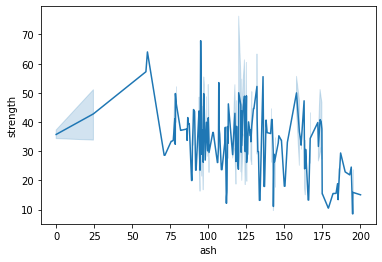

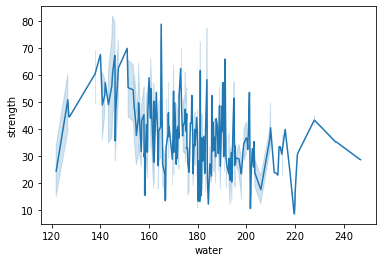

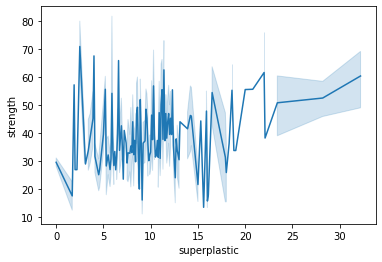

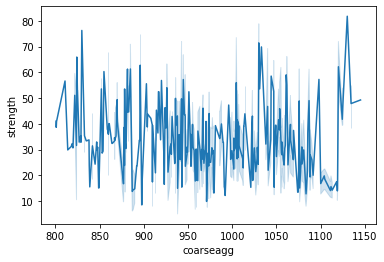

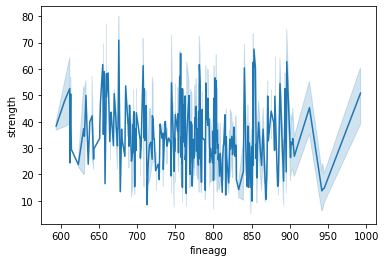

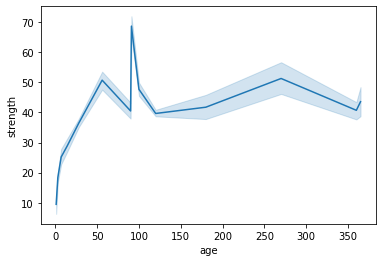

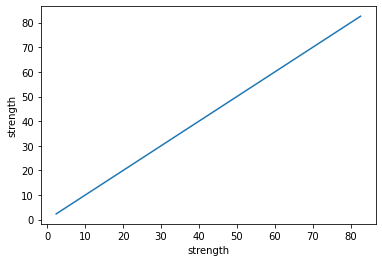

In [12]:
for i in df.columns:
    sns.lineplot(x=i,y='strength',data=df)
    plt.show()

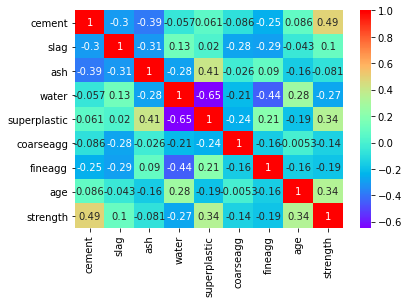

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

Insights
* Strong Positive correlation between Cement and Strength. This is true because the strength of the concrete increases with the increase in amount of cement added.
* Superplastic and Age are 2 other factors influencing the concrete strength
* Strong neagative correlation between Superplastic and Water
* Negative correlation between fineAgg and Water
* Positive Correlation between SuperPlastic and Ash

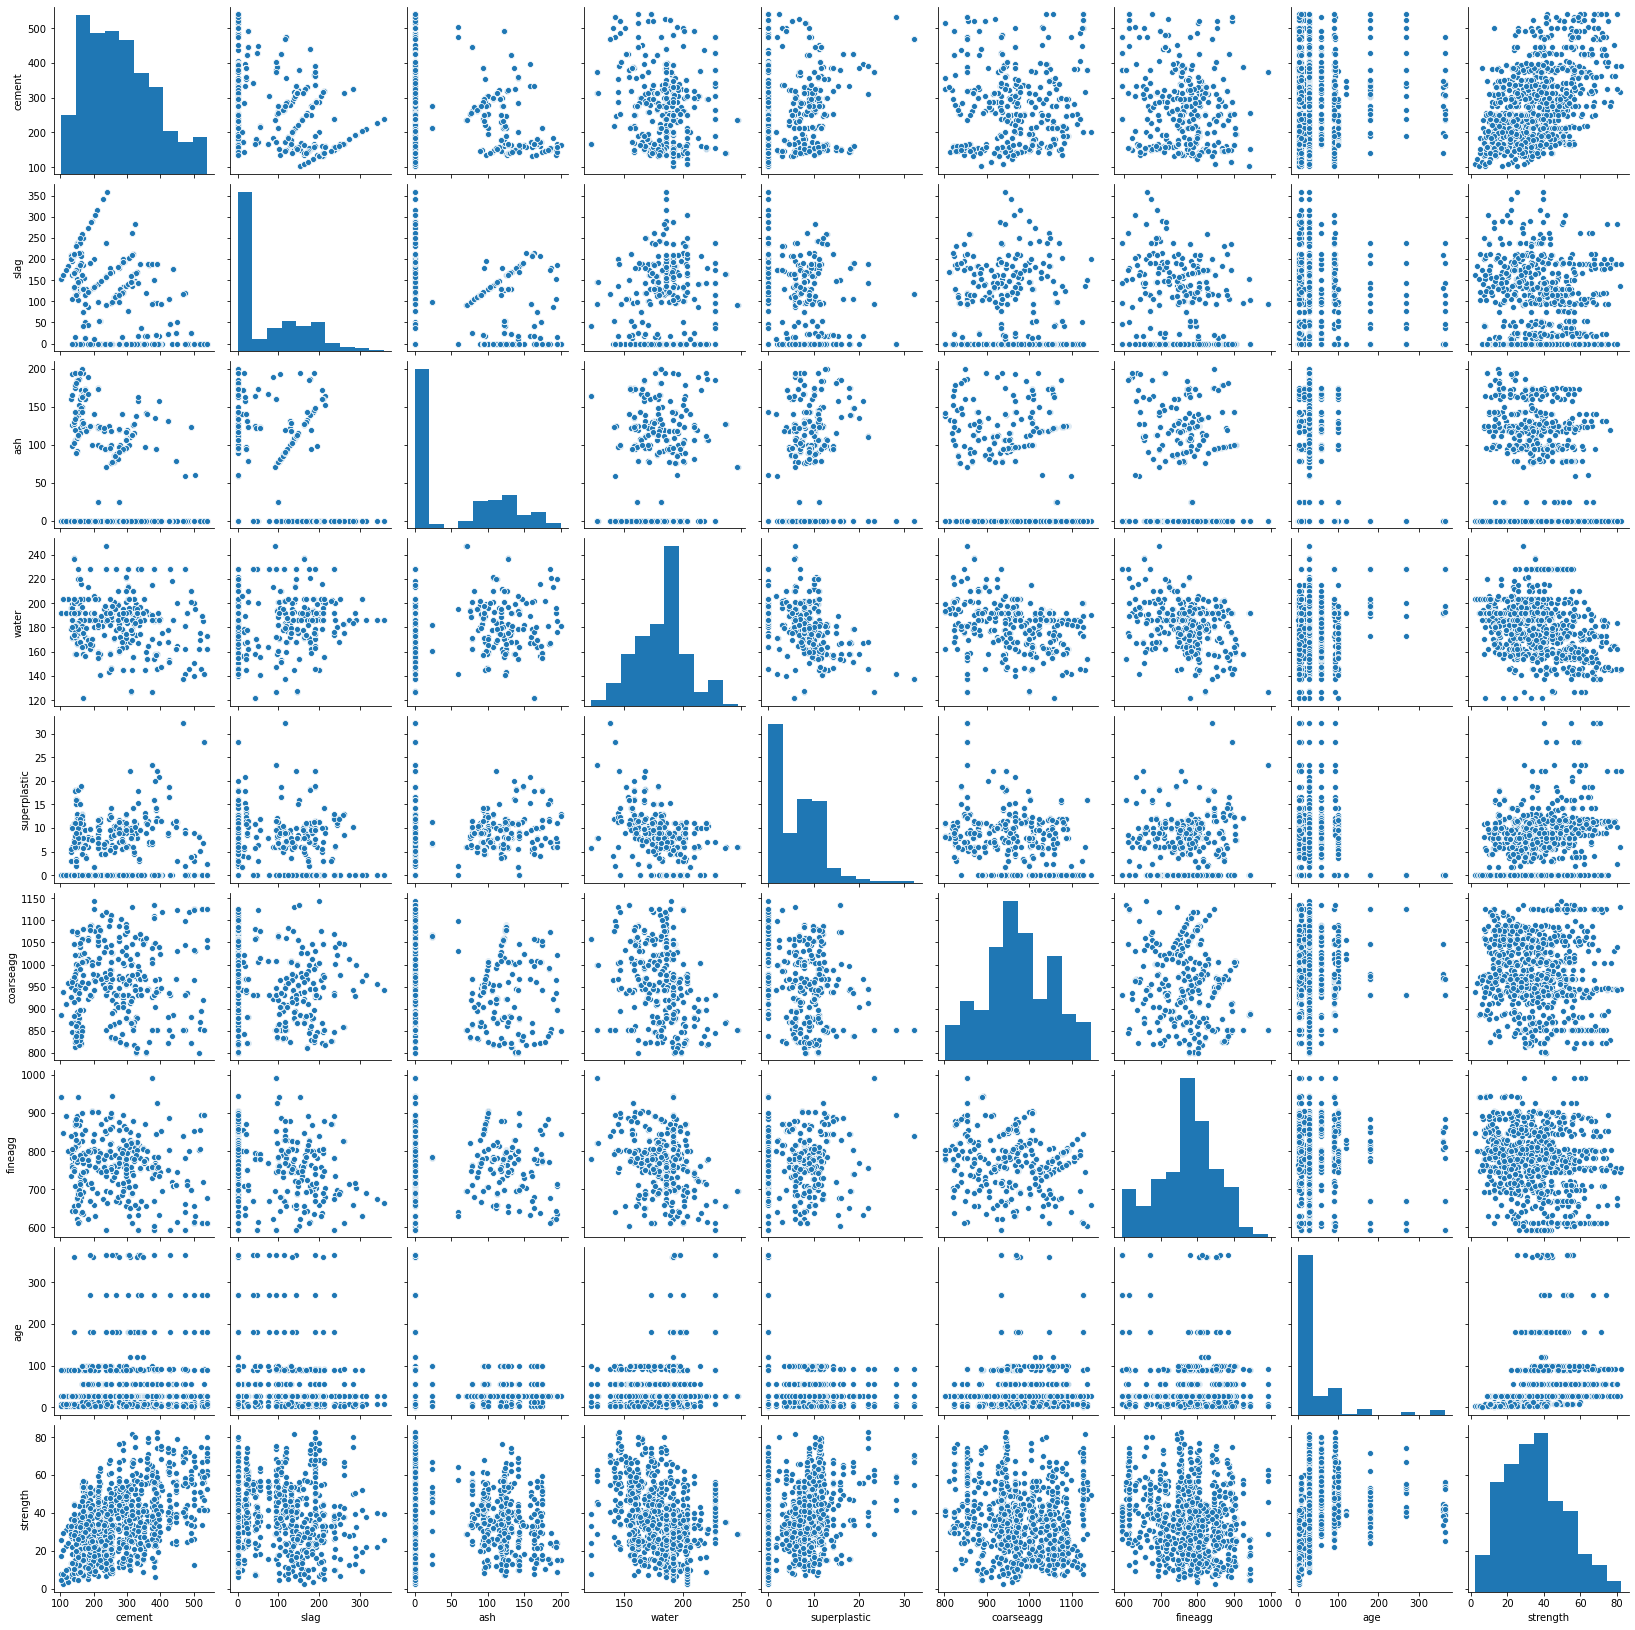

In [14]:
sns.pairplot(df)

### Feature Engineering

In [15]:
## Deriving a new feature based on Water and Cement fields
# water cement ratio 
df['w/c_ratio']=df['water']/df['cement']
df.drop(['water','cement'],axis=1,inplace=True)

## Converting the 'age' feature to categorical, and then One hot Encoding
df['age']=df.age.astype(str)
df=pd.get_dummies(df,columns=['age'],drop_first=True)

## Transforming the heavily skewed features
## Log transformation cannot be applied here as some 0 values are found. So, taking sqrt
df['slag']=df['slag'].apply(np.sqrt)
df['superplastic']=df['superplastic'].apply(np.sqrt)


In [16]:
df.head()

,slag,ash,superplastic,coarseagg,fineagg,strength,w/c_ratio,age_100,age_120,age_14,age_180,age_270,age_28,age_3,age_360,age_365,age_56,age_7,age_90,age_91
0,14.560220,0.0,0.000000,971.8,748.5,29.89,1.440198,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6.496153,124.3,3.286335,1080.8,796.2,23.51,0.937241,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.000000,95.7,2.345208,956.9,861.2,29.22,0.749600,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10.677078,0.0,0.000000,932.0,670.0,45.85,0.857143,0,0,0,0,0,1,0,0,0,0,0,0,0
4,13.542526,0.0,3.016621,1047.4,696.7,18.29,1.248708,0,0,0,0,0,1,0,0,0,0,0,0,0


### Data Preprocessing

#### Feature Scaling and Splitting Train/Test

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.drop('strength',axis=1)
y=df.pop('strength')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
cols=['slag','ash','superplastic','coarseagg','fineagg','w/c_ratio']
features=X_train_scaled[cols]
features_test=X_test_scaled[cols]
sca=scaler.fit(features.values)
sca_test=scaler.fit(features_test.values)
features=sca.transform(features.values)
features_test=sca_test.transform(features_test.values)
X_train_scaled[cols]=features
X_test_scaled[cols]=features_test
print(X_train_scaled.head())
print(X_test_scaled.head())


          slag       ash  superplastic  coarseagg   fineagg  w/c_ratio  \
443  -0.905555  1.113405      0.839640   1.281971  0.178553   0.361123   
689  -0.905555  0.718853      0.584229   0.375886  1.510817   0.282423   
1022 -0.905555  1.247585      0.955655   0.040161  0.335437   1.539566   
826   1.216812  1.153340      0.377368  -1.343927 -1.605684   2.947178   
758  -0.905555  0.718853      0.584229   0.271050  1.459768   0.357035   

      age_100  age_120  age_14  age_180  age_270  age_28  age_3  age_360  \
443         0        0       0        0        0       0      0        0   
689         0        0       0        0        0       0      0        0   
1022        0        0       0        0        0       1      0        0   
826         0        0       0        0        0       1      0        0   
758         0        0       0        0        0       0      0        0   

      age_365  age_56  age_7  age_90  age_91  
443         0       1      0       0       0  
689 

#### Linear Regression

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)
train_score=lr_model.score(X_train_scaled,y_train)
score1=lr_model.score(X_test_scaled,y_test)

print("Train Score of simple Linear Model is {}".format(train_score))
print("Test Score of simple Linear Model is {}".format(score1))
y_pred=lr_model.predict(X_test_scaled)
RMSE1=np.sqrt(mean_squared_error(y_test,y_pred))

Train Score of simple Linear Model is 0.7887166689821337
Test Score of simple Linear Model is 0.7532427789252348


#### Ridge Model

In [51]:
## Ridge Linear Model

ri=Ridge()
rid_model=ri.fit(X_train_scaled,y_train)
y_pred=rid_model.predict(X_test_scaled)
score2=r2_score(y_test,y_pred)
print("r2_score of Ridge is {}".format(score2))
print("RMSE of Ridge is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
RMSE2=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Ridge is 0.741530147861776
RMSE of Ridge is 7.749984299160052


#### Lasso Model

In [52]:
## Lasso Model
la=Lasso()
la_model=la.fit(X_train_scaled,y_train)
y_pred=la_model.predict(X_test_scaled)
score3=r2_score(y_test,y_pred)
print("r2_score of Lasso is {}".format(score3))
print("RMSE of Lasso is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE3=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Lasso is 0.5480477792584899
RMSE of Lasso is 10.248071288611849


#### Decision Tree

In [53]:

## Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr_model=dtr.fit(X_train,y_train)
y_pred=dtr_model.predict(X_test)
score4=r2_score(y_test,y_pred)
print("r2_score of Decision Tree is {}".format(score4))
print("RMSE of Decision Tree is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
RMSE4=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Decision Tree is 0.7997290737065146
RMSE of Decision Tree is 6.821891828648466


#### Random Forest 

In [54]:

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr_model=rfr.fit(X_train,y_train)
y_pred=rfr_model.predict(X_test)
score5=r2_score(y_test,y_pred)
print("r2_score of Random Forest is {}".format(score5))
print("RMSE of Randonm Forest is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE5=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Random Forest is 0.8803648384768233
RMSE of Randonm Forest is 5.272605709790833


In [55]:
## feature importances from Random Forest Model
pd.DataFrame(rfr.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values(by='Imp',ascending=False)

,Imp
w/c_ratio,0.416458
age_3,0.161600
age_7,0.114451
slag,0.103294
superplastic,0.044147
fineagg,0.038948
coarseagg,0.031512
age_28,0.022893
age_14,0.019041
age_100,0.016816


In [56]:
print("Train Score of Random Forest is {}".format(rfr_model.score(X_train,y_train)))
print("Test Score of Random Forest is {}".format(rfr_model.score(X_test,y_test)))

Train Score of Random Forest is 0.9833918024890448
Test Score of Random Forest is 0.8803648384768233


#### Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr_model=gbr.fit(X_train,y_train)
y_pred=gbr_model.predict(X_test)
score6=r2_score(y_test,y_pred)
print("r2_score of Gradient Boost is {}".format(score6))
print("RMSE of Gradient Boost is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
RMSE6=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Gradient Boost is 0.8487377078930815
RMSE of Gradient Boost is 5.928723739327463


In [58]:
print("Train Score is {}".format(gbr_model.score(X_train,y_train)))
print("Test Score is {}".format(gbr_model.score(X_test,y_test)))

Train Score is 0.9222315666500459
Test Score is 0.8487377078930815


#### Bagging Algorithm

In [59]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(base_estimator=dtr,n_estimators=50,random_state=7)
br_model=br.fit(X_train,y_train)
y_pred=br_model.predict(X_test)
score7=r2_score(y_test,y_pred)
print("r2_score of Bagging is {}".format(score7))
print("RMSE of Bagging is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
RMSE7=np.sqrt(mean_squared_error(y_test,y_pred))

r2_score of Bagging is 0.8737407974190573
RMSE of Bagging is 5.416607871564341


In [60]:
print("Train Score is {}".format(br_model.score(X_train,y_train)))
print("Test Score is {}".format(br_model.score(X_test,y_test)))

Train Score is 0.9822910553283963
Test Score is 0.8737407974190573


#### K-Fold Cross Validation

In [61]:
## KFold cross validation on Random Forest Algorithm
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10,shuffle=True)
results=cross_val_score(rfr_model,X_train.values,y_train.values,cv=kfold,scoring='neg_mean_squared_error')
score_results=cross_val_score(rfr_model,X_train.values,y_train.values,cv=kfold)
print(results)
score8=score_results.mean()

print ("Average RMSE for Random Forest is {}".format(np.sqrt(-results.mean())))
print ("Cross Validation Score for Random Forest is {}".format(score8))


[-22.17298577 -25.37272535 -22.84060703 -25.84275219 -49.81004252
 -49.82830684 -26.23311342 -24.6478537  -34.11900146 -30.76890608]
Average RMSE for Random Forest is 5.5824393802878625
Cross Validation Score for Random Forest is 0.8891924692493968


#### Hyperparameter Tuning

In [62]:
## Hyper parameter tuning for Random Forest Algorithm
## Grid search 
from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}

gsv=GridSearchCV(rfr,param_grid,cv=5,verbose=2,n_jobs=4)
gsv.fit(X,y)
gsv.best_params_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   29.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   38.9s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [63]:
rf=RandomForestRegressor(bootstrap=True,
 max_depth=50,
 max_features='auto',
 min_samples_leaf=2,
 n_estimators=100)

res_rmse=cross_val_score(rf,X,y,cv=10,scoring='neg_mean_squared_error')
score9=cross_val_score(rf,X,y,cv=10).mean()
RMSE9=np.sqrt(-res_rmse.mean())
print("Average RMSE of Random Forest Tuned is {}".format(np.sqrt(-res_rmse.mean())))
print("Average Score of Random Forest Tuned is {}".format(score9))
##print("Average R2-Coefficient of Determination is {}%".format(rf.rsquared*100))


Average RMSE of Random Forest Tuned is 5.151138326764746
Average Score of Random Forest Tuned is 0.8965243608322364


#### Model Comparison

In [64]:
# dataframe to compare the Models and their metrics
dict={'Model':['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','Gradient Boost'
               ,'Bagging Regressor','Random Forest Tuned']
      ,'Test Accuracy Score':[score1,score2,score3,score4,score5,score6,score7,score9]
     ,'RMSE':[RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6,RMSE7,RMSE9]}
Model_df=pd.DataFrame(dict)
Model_df.sort_values(by='Test Accuracy Score',ascending=False).reset_index(drop=True)

,Model,Test Accuracy Score,RMSE
0,Random Forest Tuned,0.896524,5.151138
1,Random Forest,0.880365,5.272606
2,Bagging Regressor,0.873741,5.416608
3,Gradient Boost,0.848738,5.928724
4,Decision Tree,0.799729,6.821892
5,Linear Regression,0.753243,7.572352
6,Ridge,0.741530,7.749984
7,Lasso,0.548048,10.248071


#### Pipeline- Automate & Simplify the Process

In [65]:
##!pip install category_encoders

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
## from category_encoders import OrdinalEncoder

In [67]:
df=pd.read_csv('C:/Users/Bharathy_Nat/aiml_repo/Concrete-Strength-Prediction/concrete.csv')

In [68]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [69]:
df['w/c_ratio']=df['water']/df['cement']
df.drop(['water','cement'],axis=1,inplace=True)
df['age']=df.age.astype(str)
df['slag']=df['slag'].apply(np.sqrt)
df['superplastic']=df['superplastic'].apply(np.sqrt)
X=df.drop('strength',axis=1)
y=df.pop('strength')

In [70]:
one_hot_cols=['age']
numeric_features=['w/c_ratio','slag','ash','superplastic','coarseagg','fineagg']
one_hot_transform=Pipeline(steps=[('oneHot',OneHotEncoder())])
numeric_transform=Pipeline(steps=[('scaler',StandardScaler())])
preprocessor=ColumnTransformer(transformers=[('one_hot',one_hot_transform,one_hot_cols),
                               ('num',numeric_transform,numeric_features)])
clf=Pipeline(steps=[('preprocess',preprocessor),('Regressor',RandomForestRegressor(bootstrap=True,
 max_depth=50,
 max_features='auto',
 min_samples_leaf=2,
 n_estimators=100))])


In [71]:
X_trains,X_tests,y_trains,y_tests=train_test_split(X,y,random_state=1,test_size=0.3)
clf.fit(X_trains,y_trains)
clf.score(X_tests,y_tests)

0.9011295463625095

#### Conclusion:

Best Model for this Problem is the Tuned Random Forest Regressor with an Accuracy Score of 90.1%